<a href="https://colab.research.google.com/github/justSammy1604/Python-Learning-Stuff/blob/main/CNN_And_Tensorflow_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TENSORFLOW STUFF HERE

>A simple understanding of Tensorflow and Keras Models for traning a dataset.

In [ ]:
import tensorflow as tf
print("Tensorflow version: ",tf.__version__)

Tensorflow version:  2.13.0


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


>Building a simple model for the MNIST dataset

In [ ]:
from IPython.core import macro
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
    ]
)

predictions = model(x_train[:1]).numpy()
print(predictions)
print("\n\n\n\n")
tf.nn.softmax(predictions).numpy()

[[-0.26356968  0.4069116  -0.6775706  -1.0587841   0.00859922 -0.72457427
  -0.23725633 -0.173633    0.25745493 -0.08128656]]







array([[0.09078039, 0.17749184, 0.06000587, 0.04098593, 0.1191773 ,
        0.05725063, 0.09320083, 0.0993233 , 0.15285167, 0.10893229]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1],predictions).numpy()

print("\n\n\n")

model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=10)





Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2950 - accuracy: 0.9145
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1471 - accuracy: 0.9565
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1060 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0895 - accuracy: 0.9722
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0757 - accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0681 - accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0595 - accuracy: 0.9809
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0521 - accuracy: 0.9831
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0494 - accuracy: 0.9833
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss

>We can see that the model has a 98% accuracy rate by using the Sequential model

In [ ]:
model.evaluate(x_test,y_test,verbose=3)

[0.07133373618125916, 0.9801999926567078]

####Basic Classification using Tensorflow: Classify Images of clothing

In [ ]:
#Importing Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

+ Loading the necessary data in the variable `fashion_mnist`

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

#Spliting the training and testing datasets from the Fashion MNIST

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Using the class imgaes given below
`class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
`
These will be using for the plotting part

Exploring the data

In [ ]:
print(train_images.shape)
print("\n\n\n")
len(train_labels)
print(train_labels)
print("\n\n\n")
print(test_images.shape)

(60000, 28, 28)




[9 0 0 ... 3 0 5]




(10000, 28, 28)


- Preprocessing the data of the Fashion Set

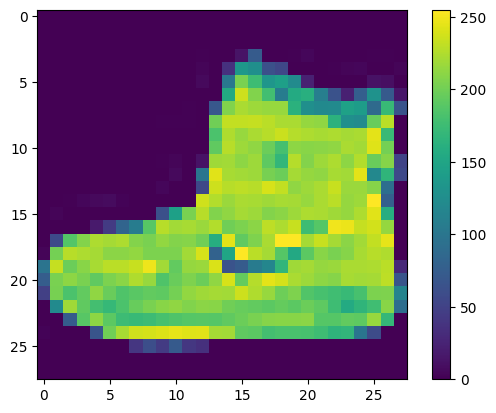

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0


+ To display the first 25 images of the dataset

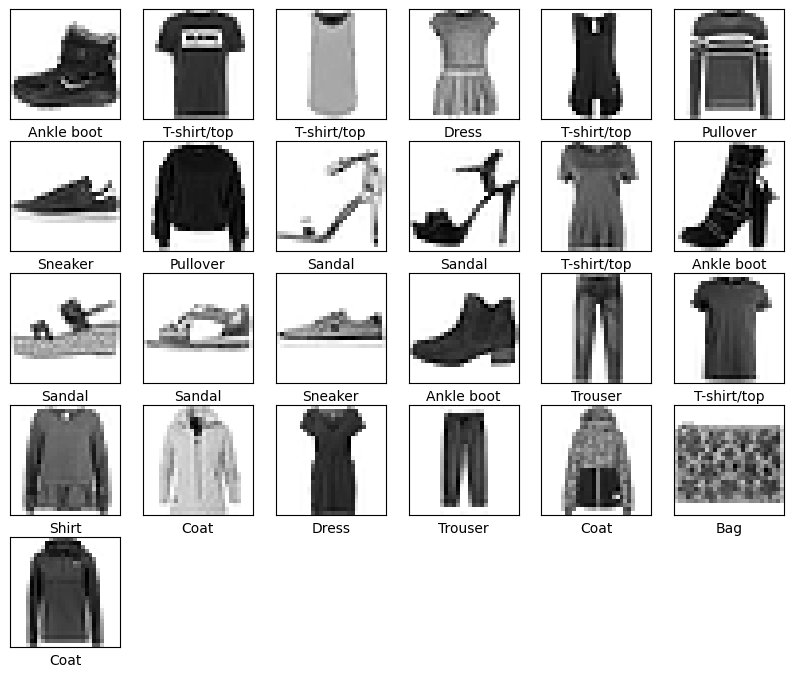

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


>Now we shall build the model and set up the layers of the model  

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

''' model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(30,30)),
        tf.keras.layers.Dense(130,activation='relu'),
        tf.keras.layers.Dense(13),
    ]
) '''

" model = tf.keras.Sequential(\n    [\n        tf.keras.layers.Flatten(input_shape=(30,30)),\n        tf.keras.layers.Dense(130,activation='relu'),\n        tf.keras.layers.Dense(13),\n    ]\n) "

Compiling the model
+ Here we use the following
1. Loss Function:- Measures how accurate the model is during traning

2. Optimizer:- How the model is updated based on the data it sees and it's loss function

3. Metrics:-Used to monitor the training and testing steps.


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Training the neural network model requires the following steps:

  + Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

  + The model learns to associate images and labels.   

  + You ask the model to make predictions about a test set—in this example, the test_images array.
  
  + Verify that the predictions match the labels from the test_labels array.


In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5056 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3757 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3391 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3153 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2987 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2837 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2708 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2608 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2515 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0

>Evaluating the accuracy of the model

In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'\nTest Accuracy of the model is {test_acc} and the loss incurred was {test_loss}')

313/313 - 1s - loss: 0.3347 - accuracy: 0.8868 - 681ms/epoch - 2ms/step

Test Accuracy of the model is 0.8867999911308289 and the loss incurred was 0.33472150564193726


Making Predictions

In [ ]:
prob_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

predict = prob_model.predict(test_images)
print("\n\n")
predict[0]
print("\n\n")

np.argmax(predict[0])

313/313 [==============================] - 1s 3ms/step








9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


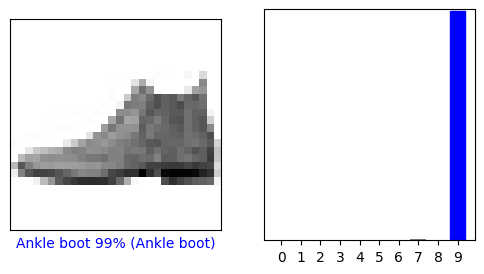

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predict[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predict[i],  test_labels)
plt.show()


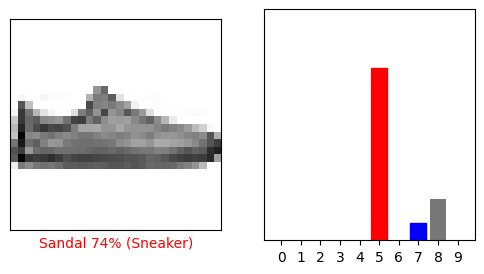

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predict[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predict[i],  test_labels)
plt.show()


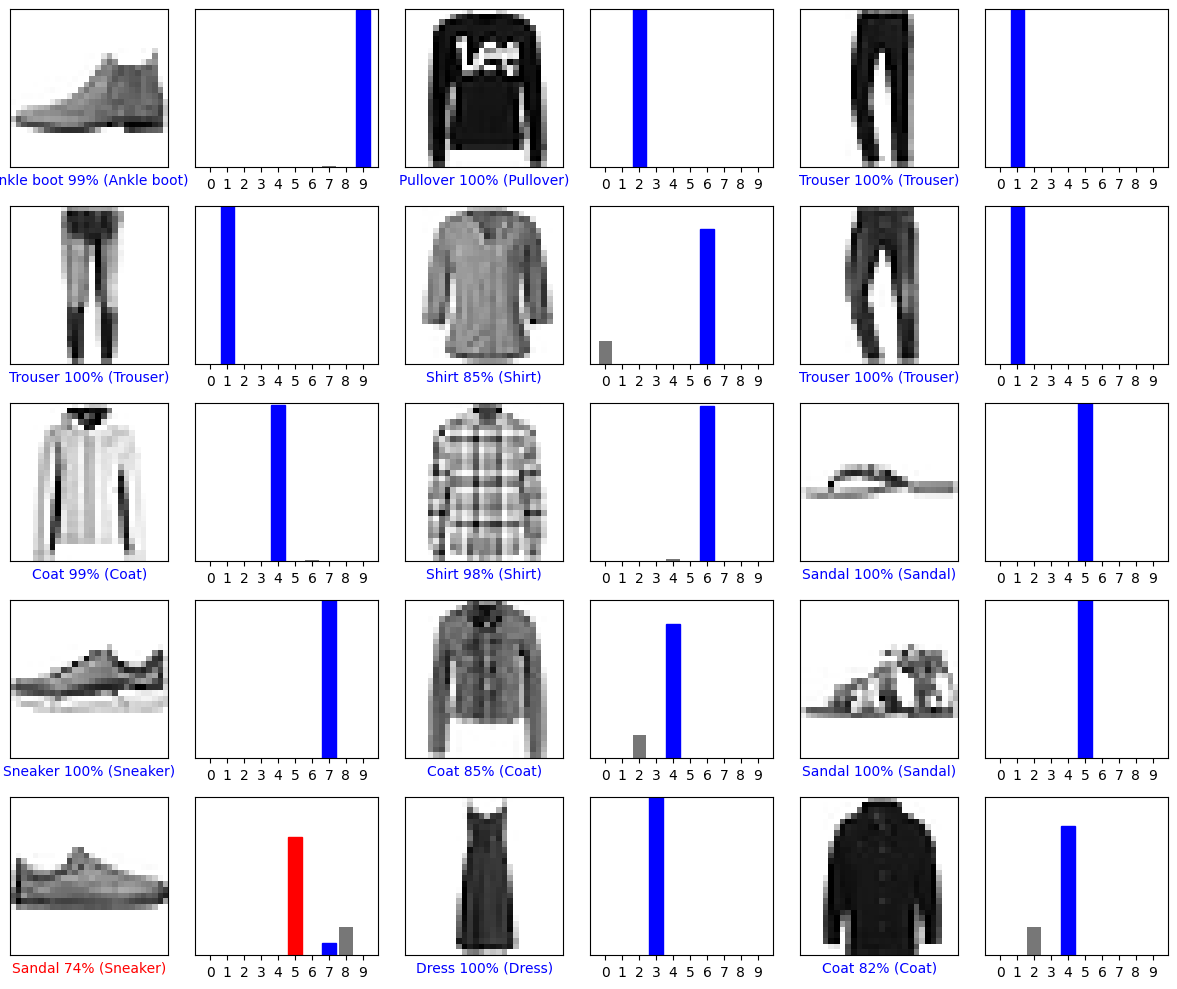

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predict[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predict[i], test_labels)
plt.tight_layout()
plt.show()


In [ ]:
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predict_single = prob_model.predict(img)
print(predict_single)

1/1 [==============================] - 0s 25ms/step
[[1.26516015e-05 6.15467191e-11 9.98504162e-01 8.65037986e-10
  1.33211352e-03 2.43281732e-11 1.51033964e-04 2.43094403e-18
  9.17092010e-12 7.57682486e-17]]


In [ ]:
#  Model can be built like this or the other way given below
# model = keras.Sequential()
# model.add(layers.Dense(2, activation="relu"))
# model.add(layers.Dense(3, activation="relu"))
# model.add(layers.Dense(4))

# model = keras.Sequential(name="my_sequential")
# model.add(layers.Dense(2, activation="relu", name="layer1"))
# model.add(layers.Dense(3, activation="relu", name="layer2"))
# model.add(layers.Dense(4, name="layer3"))


>Basic Text Classification Using Tensorflow And Keras

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
print(tf.__version__)

2.13.0


In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

['train', 'test', 'imdbEr.txt', 'README', 'imdb.vocab']

In [ ]:
# os.listdir(dataset_dir)
train_dir = os.path.join(dataset_dir,'train')
os.listdir(train_dir)

sample_f = os.path.join(train_dir,'pos/1181_9.txt')
with open(sample_f) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


+ Loading the dataset now

In [ ]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

FileNotFoundError: ignored

In [ ]:
batch_size = 34
seed = 45

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])


print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Review b"This movie has a few things going for it right off the bat. Having Dani Filth as a lead actor is automatically going to make some people like this movie. Admittedly, I love Cradle of Filth and listened to the soundtrack to this movie long before I watched it. Dani Filth is a very recognizable character and makes for a great lead. The independent filming style of the movie is great for the creepy factor. There are some GORGEOUS actresses in this movie. For being low budget, the special effects weren't bad either. The ways that people died were very creative and nightmarish.<br /><br />Now on to the cons. There is VERY little talking throughout this whole movie, thus making for very little as far as character development. It's hard to fear for the lives of limp, static characters. When there was a little talking, the F bomb was abundant, popping up in random places. Yes, I understand people swear but it seems like a preteen boy scripted this and thought himself cool for includin

+ Preparing data for training

In [ ]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)


Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)


Found 25000 files belonging to 2 classes.


In [ ]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [ ]:
max_features = 20000
sequence_length = 400

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)

In [ ]:
train_text = raw_train_ds.map(lambda x,y: x)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))


Review tf.Tensor(b'For your own good, it would be best to disregard any positive reviews concerning this movie. This flick STINKS. Now, I like (at least in theory) low budget horror movies, but this one makes the worst mistake a low budget flick can make: It takes itself WAY too seriously. And, unfortunately, that\'s not it\'s only problem.<br /><br />It\'s the story of the murderous Beane clan of the British Ilses transposed to modern times. An interesting premise, but there are two things that are immediately perplexing about this film once you start watching it.<br /><br />#1- Why is the biggest name on the CD box Jenna Jameson? She\'s a below average looking woman who can\'t act, and she has a minor role. ANSWER: She\'s apparently a well known porn star (as you no doubt read in other reviews), so I guess this is a "cameo" appearance for her. She\'s giving the film much needed "name recognition", it seems. Her top billing isn\'t any indication of her talent, though, it\'s an indicat

In [ ]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  expectations
 313 --->  idea
Vocabulary size: 20000


In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)


+ Creating the Model

In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          320016    
                                                                 
 dropout_3 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320033 (1.22 MB)
Trainable params: 320033 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)


Epoch 1/10
589/589 [==============================] - 17s 30ms/step - loss: 0.2219 - binary_accuracy: 0.9244 - val_loss: 0.2899 - val_binary_accuracy: 0.8850
Epoch 2/10
589/589 [==============================] - 12s 21ms/step - loss: 0.2084 - binary_accuracy: 0.9291 - val_loss: 0.2851 - val_binary_accuracy: 0.8876
Epoch 3/10
589/589 [==============================] - 10s 17ms/step - loss: 0.1961 - binary_accuracy: 0.9342 - val_loss: 0.2819 - val_binary_accuracy: 0.8878
Epoch 4/10
589/589 [==============================] - 11s 18ms/step - loss: 0.1855 - binary_accuracy: 0.9377 - val_loss: 0.2788 - val_binary_accuracy: 0.8914
Epoch 5/10
589/589 [==============================] - 11s 18ms/step - loss: 0.1732 - binary_accuracy: 0.9433 - val_loss: 0.2765 - val_binary_accuracy: 0.8918
Epoch 6/10
589/589 [==============================] - 10s 16ms/step - loss: 0.1642 - binary_accuracy: 0.9458 - val_loss: 0.2752 - val_binary_accuracy: 0.8922
Epoch 7/10
589/589 [==============================] 

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

736/736 [==============================] - 7s 9ms/step - loss: 0.2961 - binary_accuracy: 0.8861
Loss:  0.29609283804893494
Accuracy:  0.8860800266265869


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

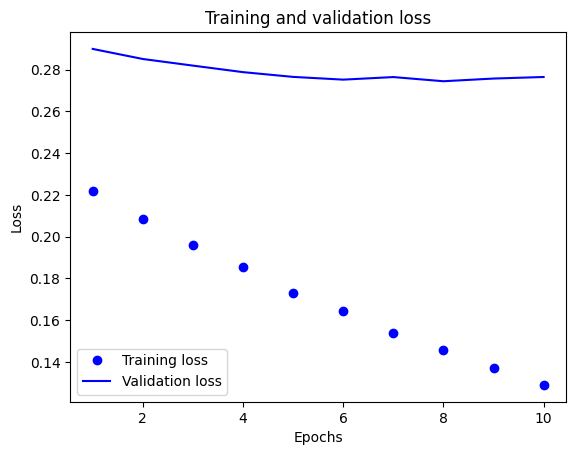

In [ ]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

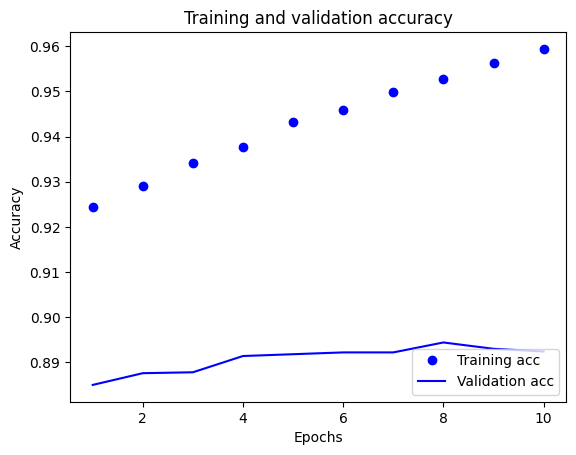

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)


736/736 [==============================] - 9s 11ms/step - loss: 0.2961 - accuracy: 0.8861
0.8860800266265869


In [ ]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

1/1 [==============================] - 0s 41ms/step


array([[0.70029384],
       [0.46341965],
       [0.37188008]], dtype=float32)

>Text Classification using the Tensorflow Hub

In [ ]:
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")


Version:  2.13.0
Eager mode:  True
Hub version:  0.14.0
GPU is NOT AVAILABLE


In [ ]:
# Split the training set into 60% and 40% to end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

# train_examples_batch

embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()


model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=10,
                    validation_data=validation_data.batch(512),
                    verbose=1)


results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRCGTIP/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRCGTIP/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteRCGTIP/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_6 (Dense)             (None, 16)                816       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48191433 (183.84 MB)
Trainable params: 48191433 (183.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
30/30 [==============================] - 59s 2s/step - loss: 0.6577 - accuracy: 0.5411 - val_loss: 0.6054 - val_accurac

>To cover more concepts on Text Classification Using Tensorflow and other pre-trained models